# Task 1.1

# 1.1.1
## For simplicity, I gathered 25 images and resized them to  28x28.

In [1]:
import cv2
import os
import numpy as np

In [3]:
print(np.__version__)
print(np.__file__)

1.26.4
C:\Users\Bella\anaconda3\lib\site-packages\numpy\__init__.py


In [2]:
dataset = [cv2.imread(os.path.join('../samples', file)) for file in os.listdir('../samples')]

In [3]:
dataset = np.stack(dataset, axis=0)
dataset.shape

(20, 28, 28, 3)

# 1.1.2

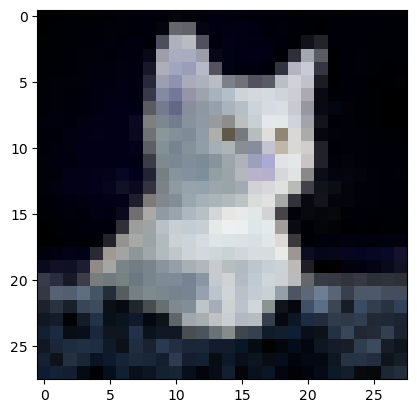

In [4]:
import matplotlib.pyplot as plt
def plotSample(i, dataset):
    plt.imshow(dataset[i])
plotSample(1, dataset)


# 1.1.3

In [9]:
# reshape the array to have flat image data with one image per row
data = dataset.reshape(dataset.shape[0], dataset.shape[1]*dataset.shape[2]*dataset.shape[3])
data.shape

(20, 2352)

In [12]:
data

array([[ 86, 108, 110, ...,  96,  89,  96],
       [  0,   0,   0, ...,  34,  46,  59],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [ 22,  48,  30, ..., 232, 237, 236],
       [162, 140, 112, ..., 151, 161, 198],
       [  7,   6,  70, ...,  22,  14, 137]], dtype=uint8)

In [14]:
# rescale pixel intensity value to range (0,1)
data_norm = data / 255.

In [15]:
data_norm

array([[0.3372549 , 0.42352941, 0.43137255, ..., 0.37647059, 0.34901961,
        0.37647059],
       [0.        , 0.        , 0.        , ..., 0.13333333, 0.18039216,
        0.23137255],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.08627451, 0.18823529, 0.11764706, ..., 0.90980392, 0.92941176,
        0.9254902 ],
       [0.63529412, 0.54901961, 0.43921569, ..., 0.59215686, 0.63137255,
        0.77647059],
       [0.02745098, 0.02352941, 0.2745098 , ..., 0.08627451, 0.05490196,
        0.5372549 ]])

In [17]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

dataCentered = center(data_norm)


In [25]:
# check zero centered dataset if the mean is close to zero
dataCentered.mean(axis=0)

array([ 3.33066907e-17,  1.33226763e-16, -1.66533454e-17, ...,
        4.16333634e-17,  9.99200722e-17, -2.49800181e-17])

In [26]:
cov = np.cov(dataCentered, rowvar=False)
cov.shape

(2352, 2352)

In [27]:
# calculate the singular values and vectors of the covariance matrix and use them to rotate our dataset
# this step a bit time consuming 
U,S,V = np.linalg.svd(cov)

In [29]:
U.shape, S.shape

((2352, 2352), (2352,))

In [30]:
epsilon = 0.1 # added to the singular values to prevent division by zero
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(dataCentered.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


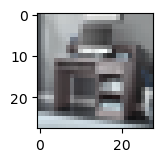

After whitening:




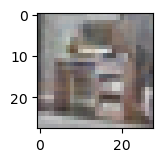

In [35]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(28,28,3))
    plt.show()
    plt.close()

plotImage(dataset[12, :])
print(f'After whitening:\n\n')
plotImage(X_ZCA_rescaled[12, :])

I have used zero-centered, standardization before, but Zero Component Analysis whitening is new to me and good to practice in this lab

# 1.2.1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load the array from the file
vecs = np.load('../vecs.npy', allow_pickle=True)

In [ ]:
vecs.dtype

dtype('O')

In [ ]:
vecs = vecs[()]

In [ ]:
print('vecs type', type(vecs))
print('vecs length', len(vecs))

vecs type <class 'dict'>
vecs length 9


In [ ]:
vecs.keys()

dict_keys(['1_pos', '2_pos', '3_pos', '4_pos', '5_pos', '6_pos', '7_pos', '8_pos', '9_pos'])

In [ ]:
pos1 = vecs['1_pos']
pos1.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
len(pos1[0])

122

In [ ]:
pos1FirstElement = pos1[0][0]
pos1FirstElement.shape

(1024,)

# 1.2.2

In [ ]:
def chosenPosData(pos):
  labelarray = None
  dataarray = None
  posdict = vecs[pos]
  for key, value in posdict.items():
    if isinstance(labelarray, np.ndarray):
      labelarray = np.hstack((labelarray, np.full((len(value),), key)))
      dataarray = np.vstack((dataarray, np.array(value)))

    else:
      labelarray = np.full((len(value),), key)
      dataarray = np.array(value)
  return labelarray, dataarray

In [ ]:
label_pos1, data_pos1 = chosenPosData('1_pos')

In [ ]:
label_pos1.shape

(1258,)

In [ ]:
data_pos1.shape

(1258, 1024)

# 1.2.3

In [ ]:
np.random.seed(42)

permut = np.random.permutation(len(data_pos1))
permuted_data_pos1 = data_pos1[permut]
permuted_label_pos1 = label_pos1[permut]

In [ ]:
permuted_label_pos1.shape

(1258,)

# Task 2.1

# 2.1.1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
Xtr.shape

(60000, 28, 28)

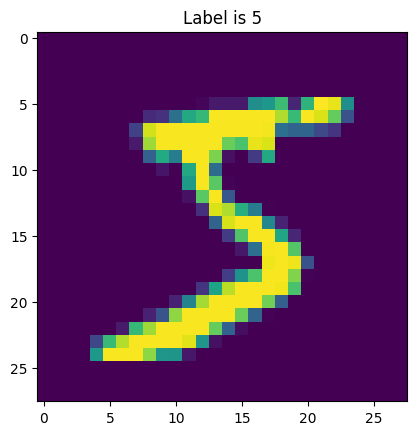

In [4]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


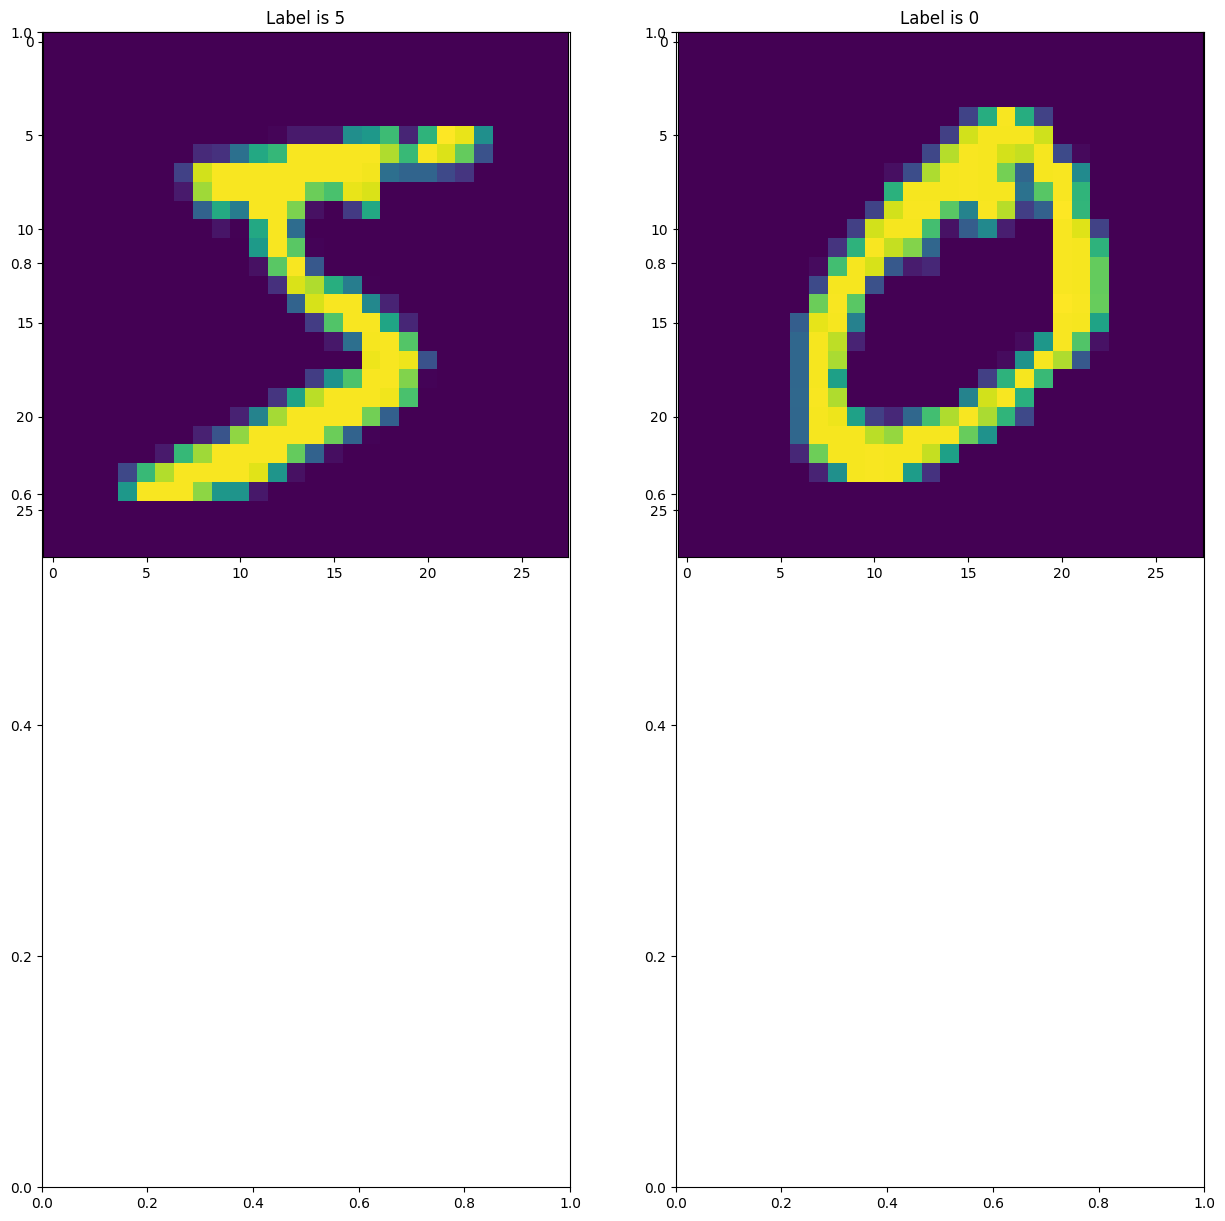

In [6]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [7]:
28*28

784

In [8]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [9]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [10]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649


# 2.1.2

In [11]:
def predict_L2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum((Tr_set-X[i,:])**2,axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict_L2(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.19


# 2.1.3 Uint problem lead to super low accuracy

In [12]:
Tr_set=Tr_set.astype('int32')
Test_images=Test_images.astype('int32')

In [13]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.811


In [14]:
def predict_L2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum((Tr_set-X[i,:])**2,axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

Labels_predicted=predict_L2(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.8294


# 2.1.4

In [15]:
from statistics import mode

In [16]:
def predict_L2_K(X,K):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum((Tr_set-X[i,:])**2,axis=1)

        Kmin_index= np.argpartition(distances, K)[:K]
        Lpred[i]=mode(Ltr_set[Kmin_index])

    return Lpred

In [17]:
Labels_predicted=predict_L2_K(Test_images,3)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.8134


# 2.2

# 2.2.1

In [18]:
def predict_L2_K(train_set, train_label, test_set,K):
    num_test=test_set.shape[0]
    Lpred=np.zeros(num_test, dtype=train_label.dtype)

    for i in range(num_test):
        distances=np.sum((train_set-test_set[i,:])**2,axis=1)

        Kmin_index= np.argpartition(distances, K)[:K]
        Lpred[i]=mode(train_label[Kmin_index])

    return Lpred

In [19]:
def kfold_split(train_set, train_label, k):
  kfold_set = []
  kfold_label = []
  fold_size = len(train_set)//k
  for i in range(k-1):
    kfold_label.append(train_label[i*fold_size:(i+1)*fold_size])
    kfold_set.append(train_set[i*fold_size:(i+1)*fold_size])
  kfold_set.append(train_set[(k-1)*fold_size:])
  kfold_label.append(train_label[(k-1)*fold_size:])
  return kfold_set, kfold_label


In [20]:
def optimal_K(kfold_set, kfold_label, Krange):
  acc_avg_lst = []
  for K in Krange:
    acc_avg = 0
    for i in range(len(kfold_set)):
      kfold_set_copy = kfold_set.copy()
      kfold_label_copy = kfold_label.copy()

      test = kfold_set[i]
      test_label = kfold_label[i]

      train = kfold_set_copy.pop(i)
      train_label = kfold_label_copy.pop(i)

      Labels_predicted = predict_L2_K(train, train_label, test, K)
      # print('predict',Labels_predicted)
      # print('actual',test_label)
      acc = np.mean(Labels_predicted==test_label)

      acc_avg += acc
    acc_avg /= len(kfold_set)
    acc_avg_lst.append(acc_avg)

  return acc_avg_lst



In [21]:
train_set = Tr_set
train_label = Ltr_set
kfold_set, kfold_label = kfold_split(train_set, train_label, 3)

In [22]:
optimal_K(kfold_set, kfold_label, range(1,8))

[1.0,
 1.0,
 0.9059810671256453,
 0.891877031937273,
 0.8599158538917576,
 0.8439233122968064,
 0.8319229298144961]

# 2.2.2

use optimal K on test set (I tried K=1 and K=2, both give same accuracy on test dataset 0.8294)

In [23]:
test_predicted = predict_L2_K(train_set, train_label, Test_images, 1)
print("Accuracy:", np.mean(test_predicted==L_test))

Accuracy: 0.8294


# Task 3.1

# 3.1.1

In [5]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: numpy._core.multiarray failed to import

In [25]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [27]:
def trainSVM(X_train, X_test, y_train, y_test, decision_function_shape, kernel):

  svm = SVC(kernel=kernel, decision_function_shape=decision_function_shape)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
  disp.plot()
  plt.title(f"confusion matrix of {decision_function_shape} of SVM with {kernel} kernel")
  plt.show()
  print(f"Classification report for SVM with {kernel} kernel:\n", classification_report(y_test, y_pred))

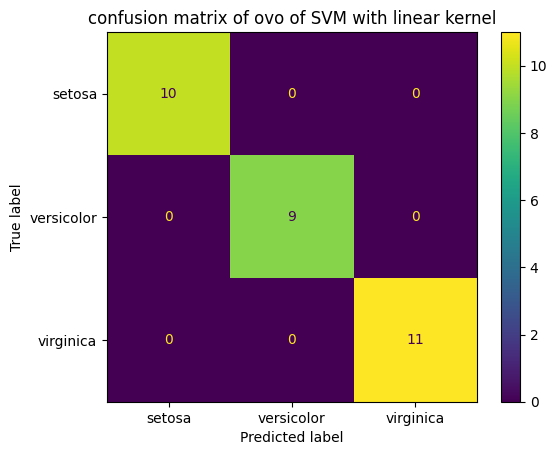

Classification report for SVM with linear kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
trainSVM(X_train, X_test, y_train, y_test, 'ovo', 'linear')

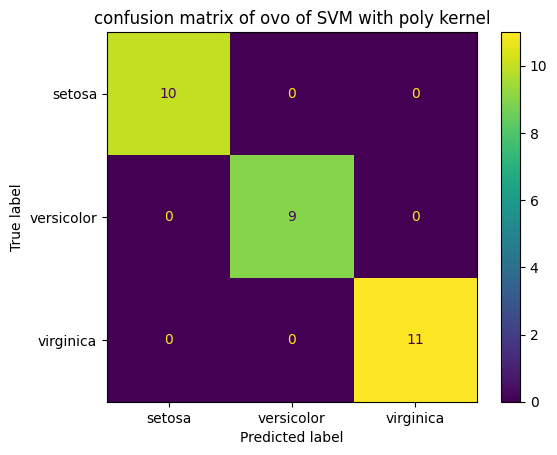

Classification report for SVM with poly kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
trainSVM(X_train, X_test, y_train, y_test, 'ovo', 'poly')

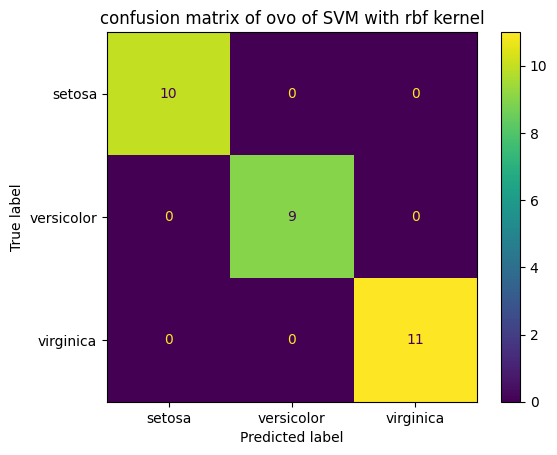

Classification report for SVM with rbf kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
trainSVM(X_train, X_test, y_train, y_test, 'ovo', 'rbf')

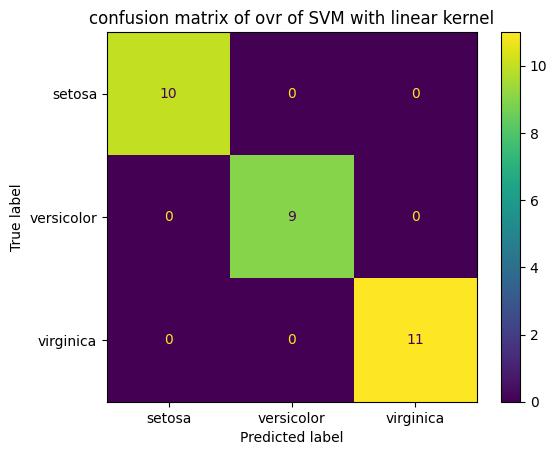

Classification report for SVM with linear kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
trainSVM(X_train, X_test, y_train, y_test, 'ovr', 'linear')

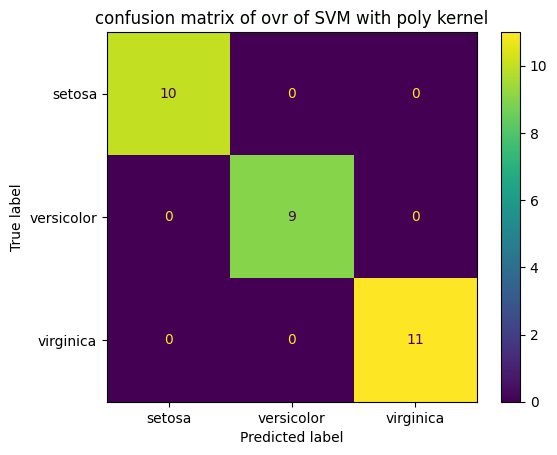

Classification report for SVM with poly kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
trainSVM(X_train, X_test, y_train, y_test, 'ovr', 'poly')

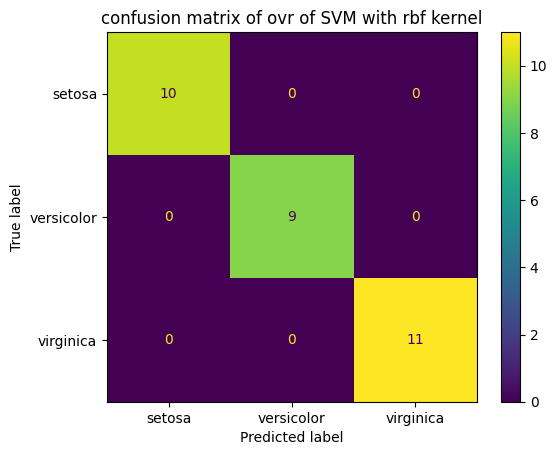

Classification report for SVM with rbf kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
trainSVM(X_train, X_test, y_train, y_test, 'ovr', 'rbf')

# 3.1.2
With Iris dataset, in one vs one training, both linear and rbf achieve 1.0 for accuracy and F1 score. In one vs rest training, both polynomial and rbf achieve 1.0 for accuracy and F1 score. rbf kernel performs best in one vs one and one vs rest.

# 3.1.3

In [34]:
svm = SVC(decision_function_shape='ovr', kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [35]:
support_vectors = svm.support_vectors_
support_vectors

array([[5.1, 3.8, 1.9, 0.4],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.5, 2.3, 1.3, 0.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5. , 2. , 3.5, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.5, 2.8, 4.6, 1.5],
       [7. , 3.2, 4.7, 1.4],
       [5.9, 3. , 4.2, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [6.1, 3. , 4.6, 1.4],
       [6.6, 2.9, 4.6, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [4.9, 2.4, 3.3, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [6.3, 2.5, 5. , 1.9],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3

In [36]:
support_indices = svm.support_
support_indices

array([ 28,  31,  32,  33,  91,   2,   6,  11,  12,  18,  22,  29,  34,
        45,  49,  54,  59,  60,  62,  73,  79,  80,  82,  86,  88,  90,
        92,  93,  99, 105, 110,   5,  10,  16,  17,  30,  37,  40,  42,
        43,  50,  56,  63,  68,  81,  83,  85,  87, 101, 109, 112, 113,
       116], dtype=int32)

In [37]:
support_vector_class = {irisclass: [] for irisclass in range(len(np.unique(y)))}
i = 0
for indice in support_indices:
  support_vector_class[y_train[indice]].append(support_vectors[i])
  i +=1
for irisclass, vectors in support_vector_class.items():
    print(f"Support vectors for class {irisclass}:\n{vectors}\n")

Support vectors for class 0:
[array([5.1, 3.8, 1.9, 0.4]), array([4.8, 3.4, 1.9, 0.2]), array([5. , 3. , 1.6, 0.2]), array([5.1, 3.3, 1.7, 0.5]), array([4.5, 2.3, 1.3, 0.3])]

Support vectors for class 1:
[array([6.7, 3.1, 4.4, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6. , 3.4, 4.5, 1.6]), array([6.7, 3.1, 4.7, 1.5]), array([6.6, 3. , 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([5. , 2. , 3.5, 1. ]), array([5.6, 2.7, 4.2, 1.3]), array([5.4, 3. , 4.5, 1.5]), array([5. , 2.3, 3.3, 1. ]), array([6.7, 3. , 5. , 1.7]), array([5.9, 3.2, 4.8, 1.8]), array([5.1, 2.5, 3. , 1.1]), array([6. , 2.7, 5.1, 1.6]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.9, 4.7, 1.4]), array([6.5, 2.8, 4.6, 1.5]), array([7. , 3.2, 4.7, 1.4]), array([5.9, 3. , 4.2, 1.5]), array([5.7, 2.6, 3.5, 1. ]), array([6.1, 3. , 4.6, 1.4]), array([6.6, 2.9, 4.6, 1.3]), array([5.5, 2.6, 4.4, 1.2]), array([4.9, 2.4, 3.3, 1. ]), array([6.9, 3.1, 4.9, 1.5]), array([6.3, 2.3, 4.4, 1.3])]

Support vectors for class 2:
[array([6.

# 3.1.4
Some code refer to https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-apython-tutorial-for-classification-problems-29c539f3ad8

The support vectors extracted in the previous task is used to plot the boundaries

## Plot the decision boundary between feature 2 vs 3

In [38]:
support_vector_0 = support_vector_class[0]
support_vector_1 = support_vector_class[1]
support_vector_2 = support_vector_class[2]

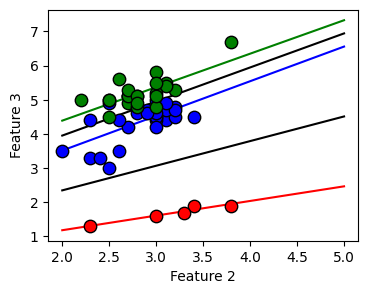

In [58]:
support_vector_0_x = [i[1] for i in support_vector_0]
support_vector_0_y = [i[2] for i in support_vector_0]
support_vector_1_x = [i[1] for i in support_vector_1]
support_vector_1_y = [i[2] for i in support_vector_1]
support_vector_2_x = [i[1] for i in support_vector_2]
support_vector_2_y = [i[2] for i in support_vector_2]

plt.figure(1, figsize=(4, 3))
plt.clf()

plt.scatter(support_vector_0_x, support_vector_0_y, s=80,
 facecolors="r", zorder=10, edgecolors="k")
plt.scatter(support_vector_1_x, support_vector_1_y, s=80,
 facecolors="b", zorder=10, edgecolors="k")
plt.scatter(support_vector_2_x, support_vector_2_y, s=80,
 facecolors="g", zorder=10, edgecolors="k")

w0, b0 = np.polyfit(support_vector_0_x, support_vector_0_y, 1)
w1, b1 = np.polyfit(support_vector_1_x, support_vector_1_y, 1)
w2, b2 = np.polyfit(support_vector_2_x, support_vector_2_y, 1)

xx = np.linspace(2, 5)
plt.plot(xx, w0 *xx + b0, color='red')
plt.plot(xx, w1 * xx + b1, color='blue')
plt.plot(xx, w2 * xx + b2, color='green')

plt.plot(xx, (w0+w1) *xx/2 + (b0+b1)/2, color='black')
plt.plot(xx, (w2+w1) *xx/2 + (b2+b1)/2, color='black')

plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

## To plot all vectors along with the support vectors and the boundary

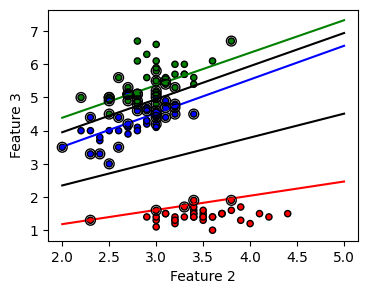

In [77]:
support_vector_0_x = [i[1] for i in support_vector_0]
support_vector_0_y = [i[2] for i in support_vector_0]
support_vector_1_x = [i[1] for i in support_vector_1]
support_vector_1_y = [i[2] for i in support_vector_1]
support_vector_2_x = [i[1] for i in support_vector_2]
support_vector_2_y = [i[2] for i in support_vector_2]

plt.figure(1, figsize=(4, 3))
plt.clf()

plt.scatter(support_vector_0_x, support_vector_0_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(support_vector_1_x, support_vector_1_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(support_vector_2_x, support_vector_2_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")

w0, b0 = np.polyfit(support_vector_0_x, support_vector_0_y, 1)
w1, b1 = np.polyfit(support_vector_1_x, support_vector_1_y, 1)
w2, b2 = np.polyfit(support_vector_2_x, support_vector_2_y, 1)

xx = np.linspace(2, 5)
plt.plot(xx, w0 *xx + b0, color='red')
plt.plot(xx, w1 * xx + b1, color='blue')
plt.plot(xx, w2 * xx + b2, color='green')

plt.plot(xx, (w0+w1) *xx/2 + (b0+b1)/2, color='black')
plt.plot(xx, (w2+w1) *xx/2 + (b2+b1)/2, color='black')


colors = np.array(['red', 'blue', 'green'])

x0 = X_train[:, 1]
x1 = X_train[:, 2]
plt.scatter(x0, x1, c=colors[y], s=20, edgecolors="k")

plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()
title = ('feature 2 vs 3 ')

## Plot the decision boundary between feature 3 vs 4

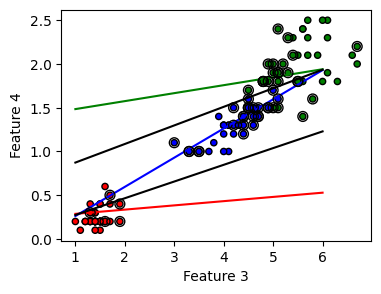

In [78]:
support_vector_0_x = [i[2] for i in support_vector_0]
support_vector_0_y = [i[3] for i in support_vector_0]
support_vector_1_x = [i[2] for i in support_vector_1]
support_vector_1_y = [i[3] for i in support_vector_1]
support_vector_2_x = [i[2] for i in support_vector_2]
support_vector_2_y = [i[3] for i in support_vector_2]

plt.figure(1, figsize=(4, 3))
plt.clf()

plt.scatter(support_vector_0_x, support_vector_0_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(support_vector_1_x, support_vector_1_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(support_vector_2_x, support_vector_2_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")

w0, b0 = np.polyfit(support_vector_0_x, support_vector_0_y, 1)
w1, b1 = np.polyfit(support_vector_1_x, support_vector_1_y, 1)
w2, b2 = np.polyfit(support_vector_2_x, support_vector_2_y, 1)

xx = np.linspace(1, 6)
plt.plot(xx, w0 *xx + b0, color='red')
plt.plot(xx, w1 * xx + b1, color='blue')
plt.plot(xx, w2 * xx + b2, color='green')

plt.plot(xx, (w0+w1) *xx/2 + (b0+b1)/2, color='black')
plt.plot(xx, (w2+w1) *xx/2 + (b2+b1)/2, color='black')


colors = np.array(['red', 'blue', 'green'])

x0 = X_train[:, 2]
x1 = X_train[:, 3]
plt.scatter(x0, x1, c=colors[y], s=20, edgecolors="k")
title = ('feature 3 vs 4 ')

plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.show()

## Note:
hmm, using np.polyfit() is getting the line fitting the points that minimize the y error. In the plot above, the three lines are obviously not we want for plotting the decision boundaries, as they are not seperating the classes well. So I have been thinking using orthogonal regression that taking both x, y error into account to fit the line, but I think that will be quite heavy for this task, so I tried a simpler way below to see if it works. In the code block below, the fitting lines are perpendicular to the line above, then intercetion b is calculated according.

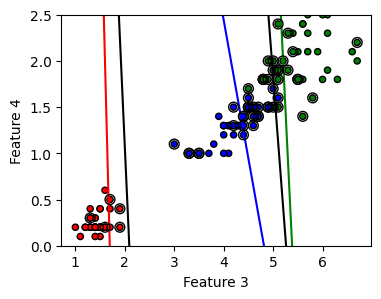

In [80]:
support_vector_0_x = [i[2] for i in support_vector_0]
support_vector_0_y = [i[3] for i in support_vector_0]
support_vector_1_x = [i[2] for i in support_vector_1]
support_vector_1_y = [i[3] for i in support_vector_1]
support_vector_2_x = [i[2] for i in support_vector_2]
support_vector_2_y = [i[3] for i in support_vector_2]

plt.figure(1, figsize=(4, 3))
plt.clf()

plt.scatter(support_vector_0_x, support_vector_0_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(support_vector_1_x, support_vector_1_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(support_vector_2_x, support_vector_2_y, s=50,
 facecolors="none", zorder=10, edgecolors="k")

w0, b0 = np.polyfit(support_vector_0_x, support_vector_0_y, 1)
w1, b1 = np.polyfit(support_vector_1_x, support_vector_1_y, 1)
w2, b2 = np.polyfit(support_vector_2_x, support_vector_2_y, 1)

# to seperate the class better, the new fitting line slope is -1/k (perpendicular)
w0 = -1/w0
w1 = -1/w1
w2 = -1/w2
# intersection is calculated based on the new slope
b0 = np.mean(support_vector_0_y) - w0 * np.mean(support_vector_0_x)
b1 = np.mean(support_vector_1_y) - w1 * np.mean(support_vector_1_x)
b2 = np.mean(support_vector_2_y) - w2 * np.mean(support_vector_2_x)

xx = np.linspace(1, 6)
plt.plot(xx, w0 *xx + b0, color='red')
plt.plot(xx, w1 * xx + b1, color='blue')
plt.plot(xx, w2 * xx + b2, color='green')
# plot boundary lines in black color
plt.plot(xx, (w0+w1) *xx/2 + (b0+b1)/2, color='black')
plt.plot(xx, (w2+w1) *xx/2 + (b2+b1)/2, color='black')
colors = np.array(['red', 'blue', 'green'])

x0 = X_train[:, 2]
x1 = X_train[:, 3]
plt.scatter(x0, x1, c=colors[y], s=20, edgecolors="k")
title = ('feature 3 vs 4 ')

plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.ylim(0,2.5)

plt.show()

## Note:
OK the plot above (second plot of feature 3 vs 4) seems to make a bit more sense than the first plot which cannot seperate classes at all. However, as we can see that in the plot of support vectors in the feature 3 and feature 4 space, the support vectors are not that 'spread out' on a line (like feature 2 and feature 3).